In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.rc('font', family='Malgun Gothic')

In [257]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [258]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [259]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [260]:
credit['STATUS'] = credit['STATUS'].map({'C':0, 'X':0, '0':1, '1':2, '2':3, '3':4, '4':5, '5':6})
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [261]:
credit_gb = credit.groupby('ID').sum()['STATUS']
credit_gb = credit_gb.apply(lambda x: 1 if x >= 24 else 0)
credit_gb

ID
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
          ..
5150482    0
5150483    0
5150484    0
5150485    0
5150487    0
Name: STATUS, Length: 45985, dtype: int64

In [262]:
df = pd.merge(app, credit_gb, on='ID')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0


In [263]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'] // 365)
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'].apply(lambda x: 0 if x == 365243 else x) // 365)

In [264]:
df.isnull().sum()
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jjong\Desktop\vscode\CWNU_ICT\AIvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered i

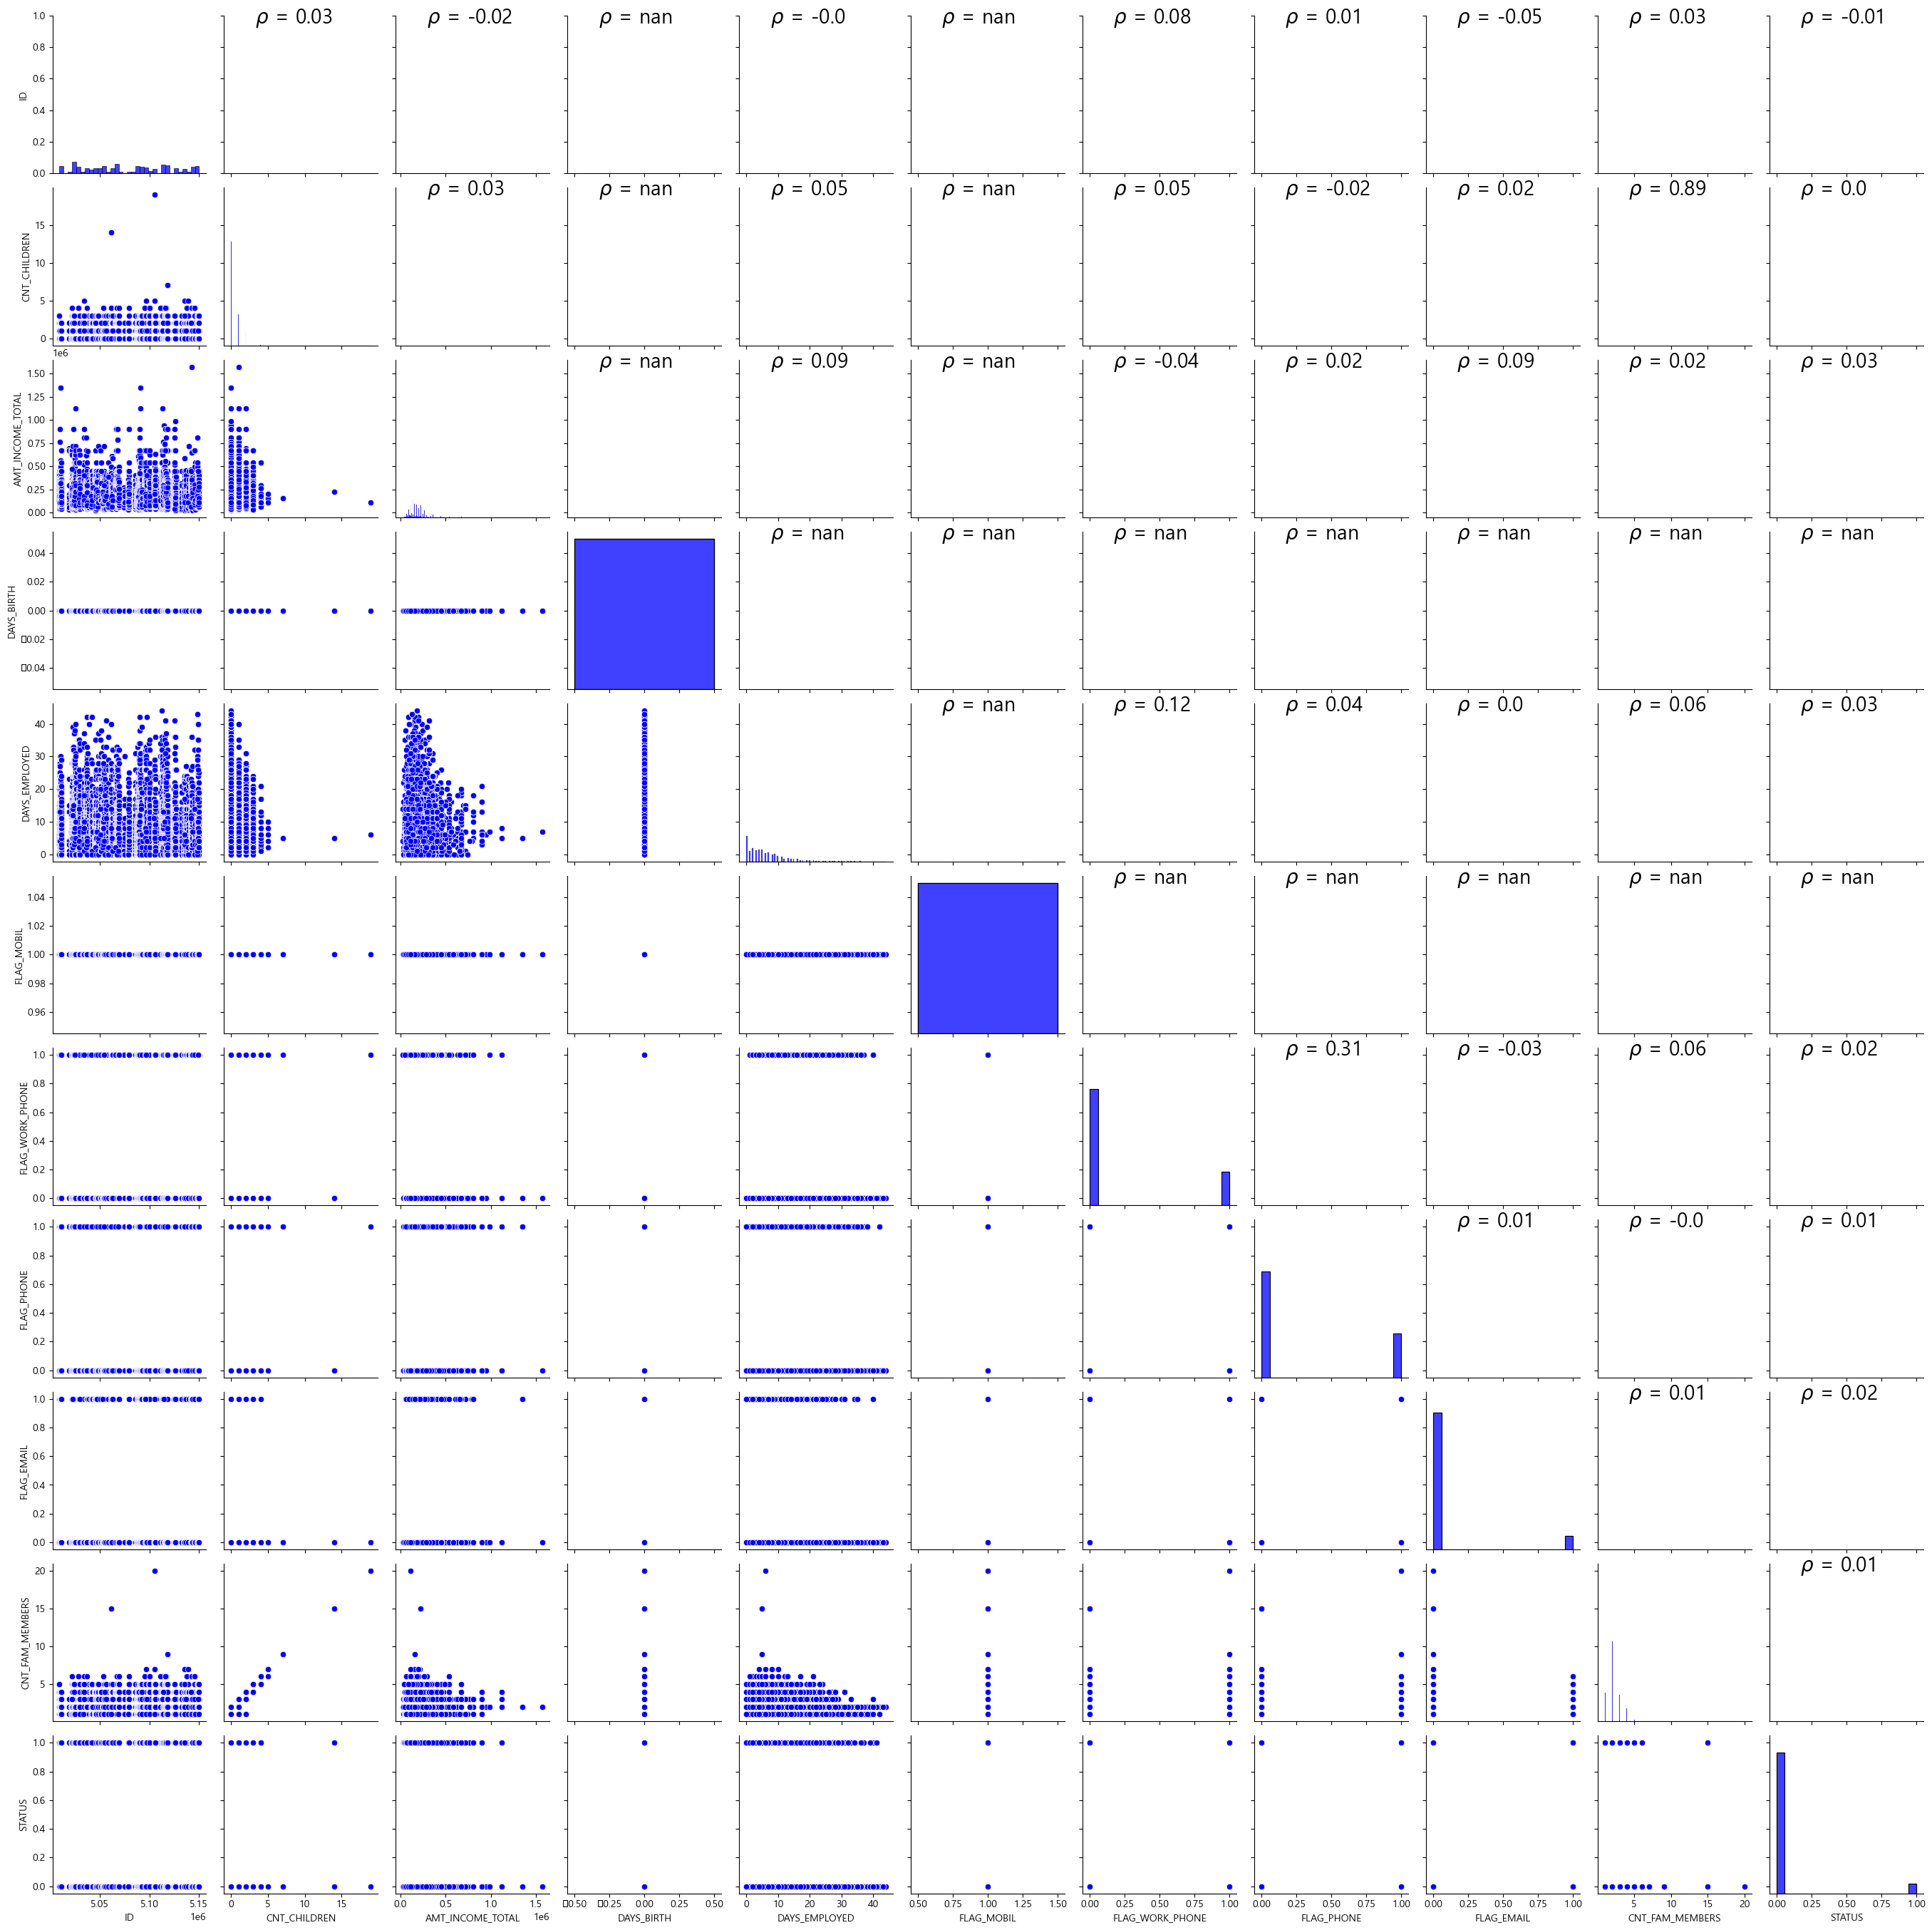

In [222]:
def corr(x, y, **kwargs):
    # 상관계수를 계산합니다.
    coef = np.corrcoef(x, y)[0][1]
    # 상관계수를 문자열로 바꿉니다.
    label = r'$\rho$ = ' + str(round(coef, 2))
    # 상관계수를 그래프 상단에 표시합니다.
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# pairplot을 그립니다.
g = sns.PairGrid(df)

# 대각선 아래쪽에는 산점도를 그립니다.
g.map_lower(sns.scatterplot, color = 'blue')

# 대각선 위쪽에는 상관계수를 표시합니다.
g.map_upper(corr)

# 대각선에는 히스토그램을 그립니다.
g.map_diag(sns.histplot, color = 'blue')

plt.show()

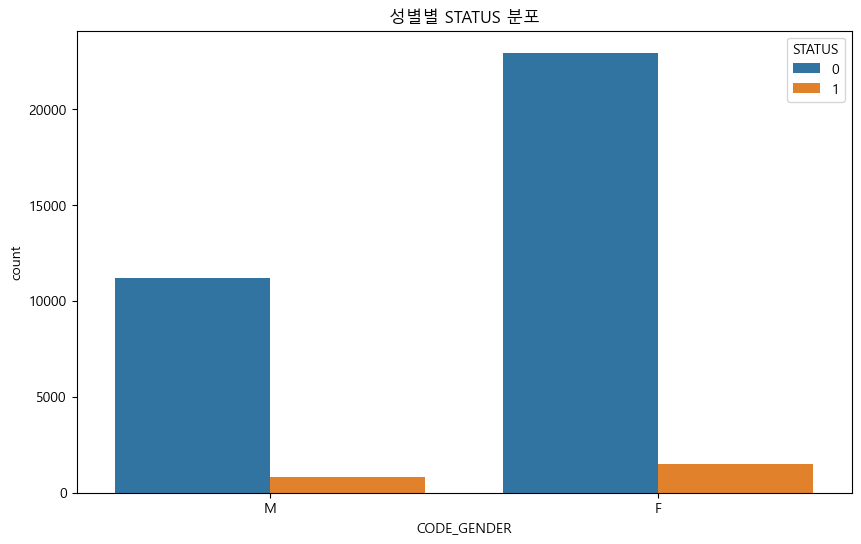

In [265]:
plt.figure(figsize=(10,6))
sns.countplot(x='CODE_GENDER', hue='STATUS', data=df)
plt.title('성별별 STATUS 분포')
plt.show()

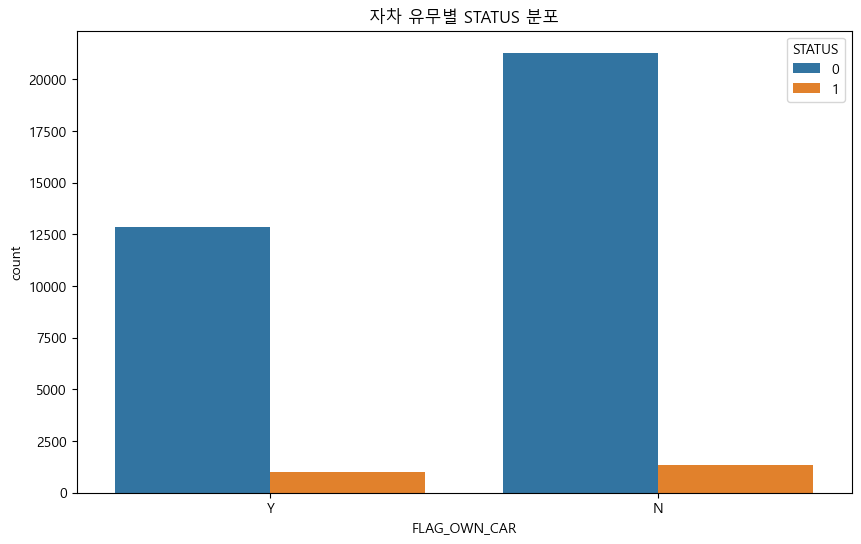

In [266]:
plt.figure(figsize=(10,6))
sns.countplot(x='FLAG_OWN_CAR', hue='STATUS', data=df)
plt.title('자차 유무별 STATUS 분포')
plt.show()

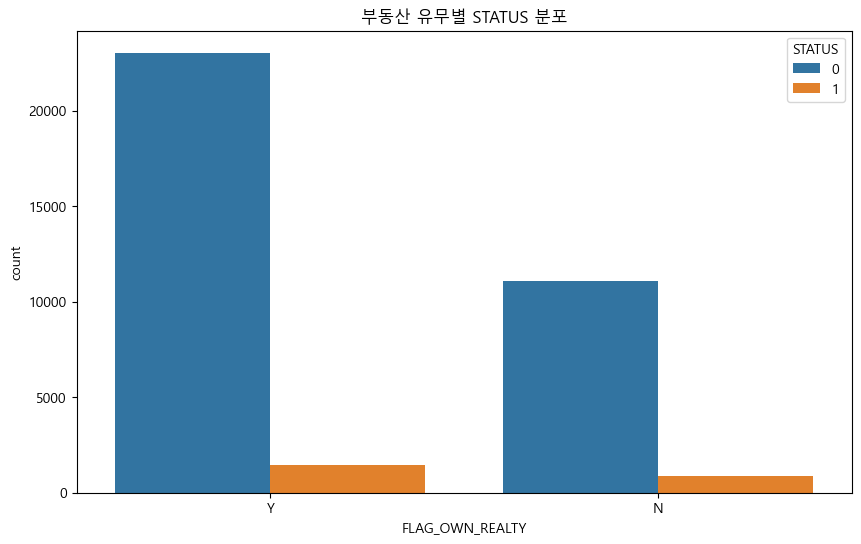

In [267]:
plt.figure(figsize=(10,6))
sns.countplot(x='FLAG_OWN_REALTY', hue='STATUS', data=df)
plt.title('부동산 유무별 STATUS 분포')
plt.show()

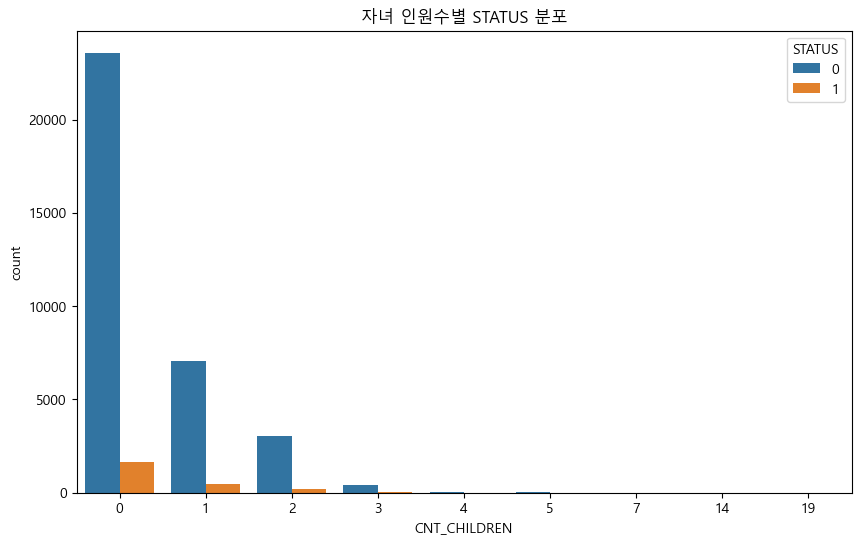

In [268]:
plt.figure(figsize=(10,6))
sns.countplot(x='CNT_CHILDREN', hue='STATUS', data=df)
plt.title('자녀 인원수별 STATUS 분포')
plt.show()

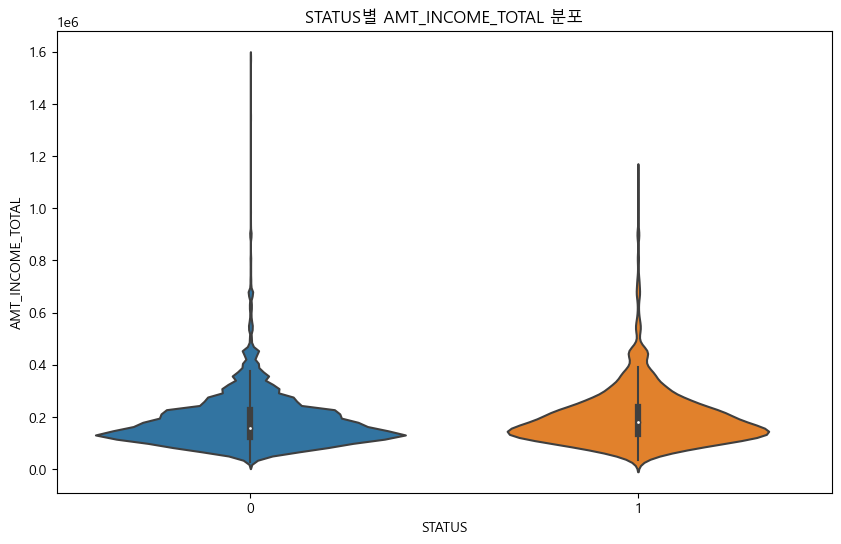

In [269]:
plt.figure(figsize=(10,6))
sns.violinplot(x='STATUS', y='AMT_INCOME_TOTAL', data=df)
plt.title('STATUS별 AMT_INCOME_TOTAL 분포')
plt.show()

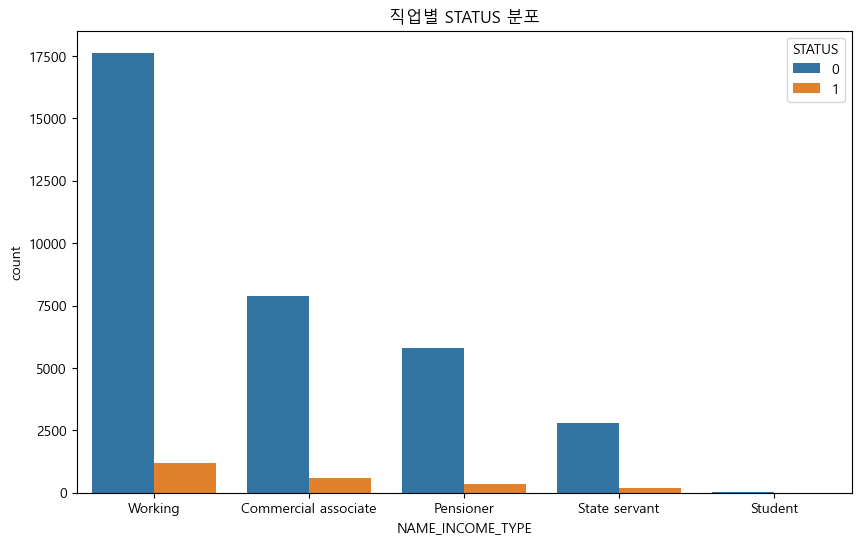

In [270]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_INCOME_TYPE', hue='STATUS', data=df)
plt.title('직업별 STATUS 분포')
plt.show()

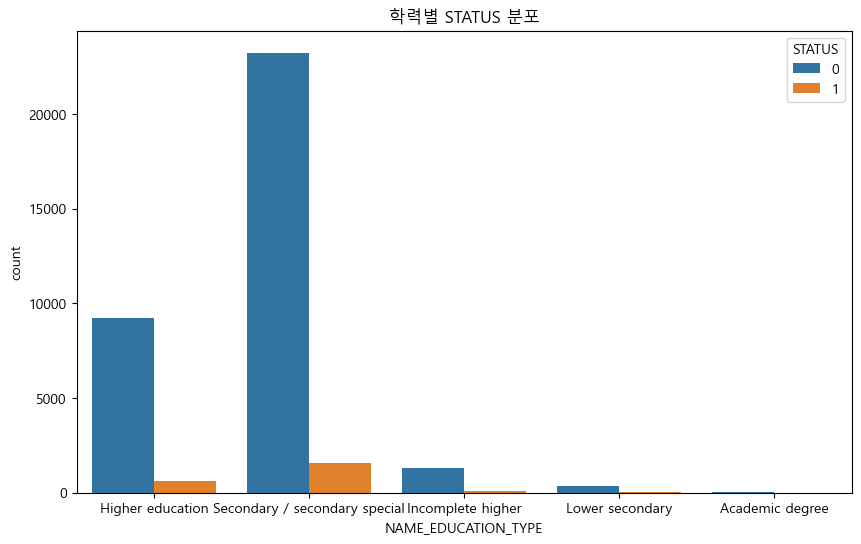

In [271]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='STATUS', data=df)
plt.title('학력별 STATUS 분포')
plt.show()

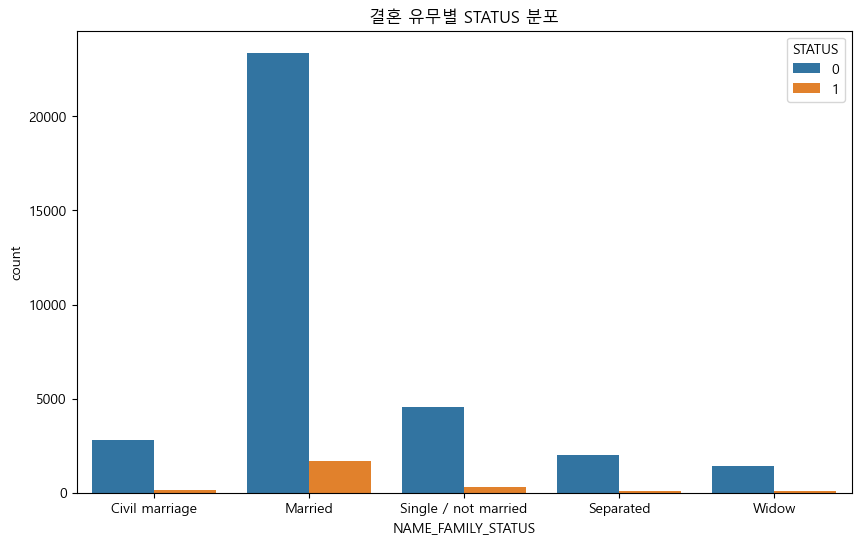

In [272]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_FAMILY_STATUS', hue='STATUS', data=df)
plt.title('결혼 유무별 STATUS 분포')
plt.show()

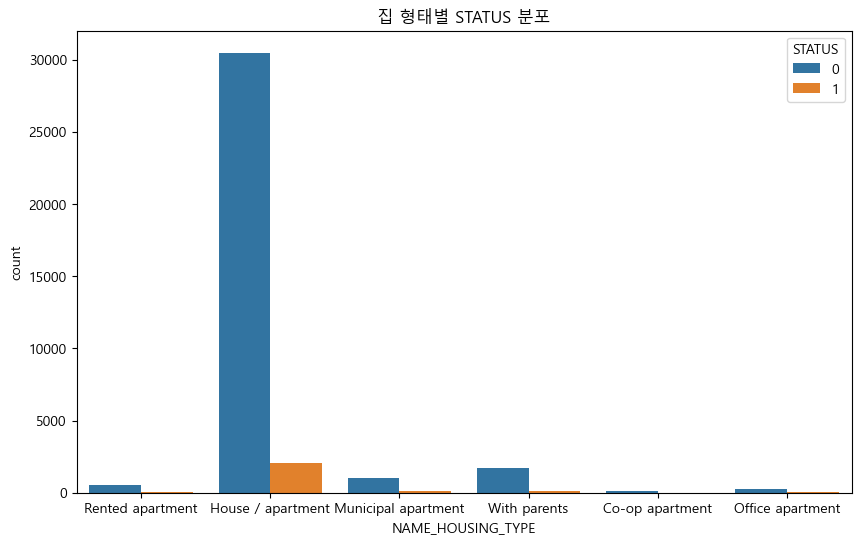

In [273]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_HOUSING_TYPE', hue='STATUS', data=df)
plt.title('집 형태별 STATUS 분포')
plt.show()

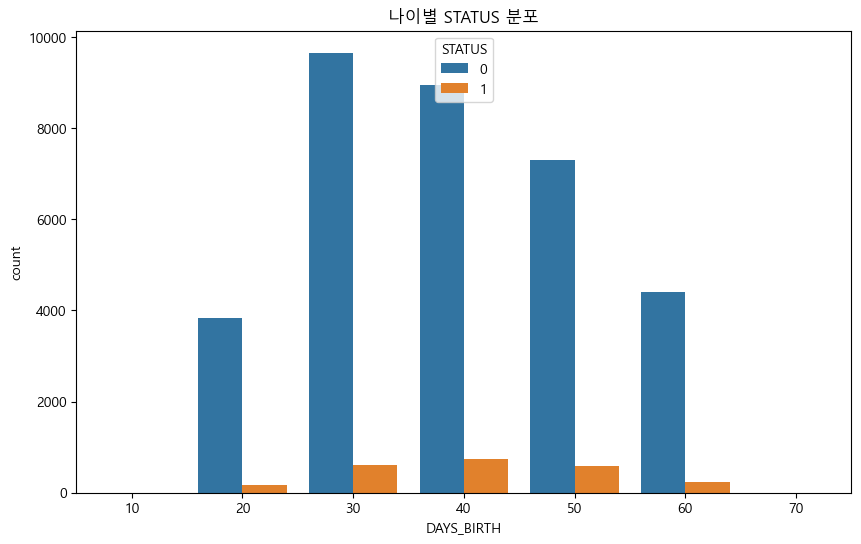

In [274]:
# 나이를 10대, 20대, ... , 80대로 분류
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = [10, 20,30,40,50,60,70]
df['DAYS_BIRTH'] = pd.cut(df['DAYS_BIRTH'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(x='DAYS_BIRTH', hue='STATUS', data=df)
plt.title('나이별 STATUS 분포')
plt.show()

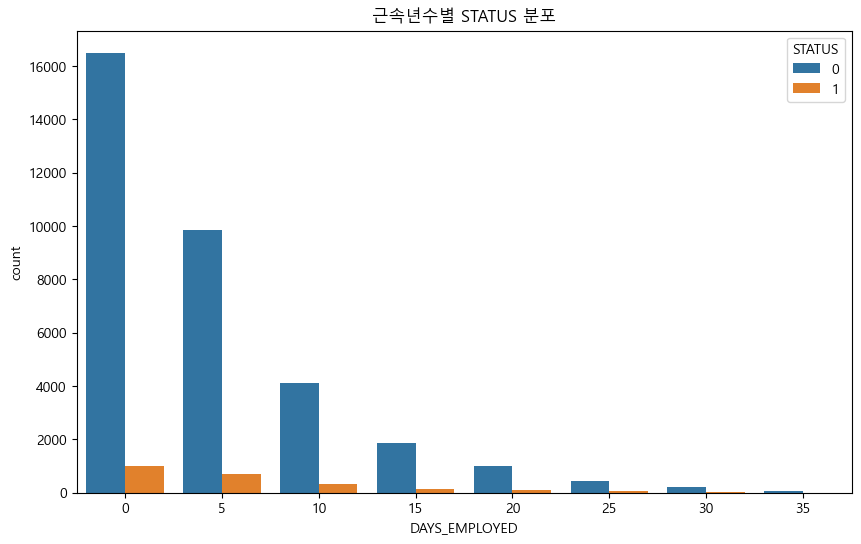

In [275]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = [0, 5, 10, 15, 20, 25, 30, 35 ]
df['DAYS_EMPLOYED'] = pd.cut(df['DAYS_EMPLOYED'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(x='DAYS_EMPLOYED', hue='STATUS', data=df)
plt.title('근속년수별 STATUS 분포')
plt.show()